In [1]:
from linkage.linkage import *
from sklearn import datasets
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib ipympl

In [2]:
digits = datasets.load_digits()
data = digits.data
num_samples = data.shape[0]
target = datasets.load_digits().target

We visualize the true labels using t-SNE

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


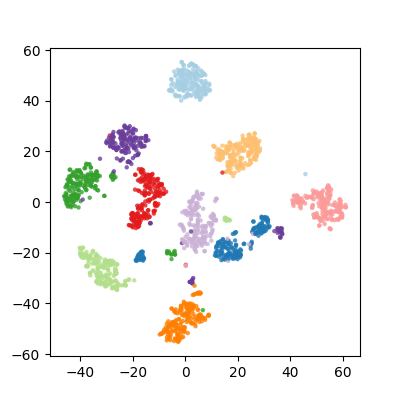

In [3]:
projection = TSNE(random_state=2, init="pca", learning_rate="auto").fit_transform(data)

plt.figure(figsize=(4,4))
plt.scatter(projection.T[0], projection.T[1], s=10, linewidth=0, c=np.array(sns.color_palette("Paired", 10))[datasets.load_digits().target], alpha=0.8)
plt.show()

Now we cluster the data with gamma-linkage.
In order to choose the parameters, we start by looking at a vineyard.

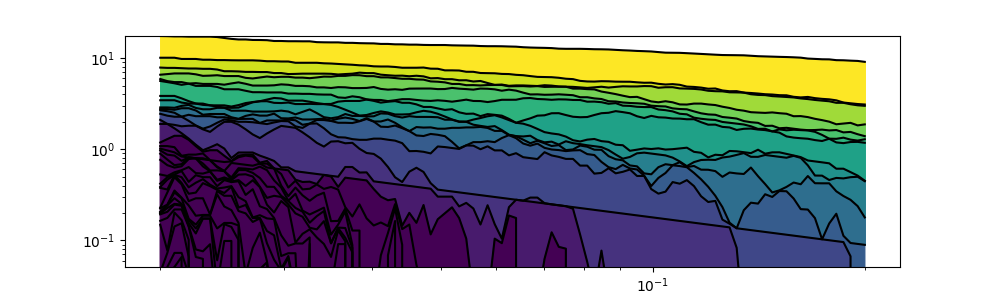

In [4]:
p = Persistable(data)
p.parameter_selection(color_firstn=15)

Choose k in the 12 cluster gap.
We choose a small k in this gap, because we'll get a larger percentage of points clustered. 

In [5]:
gamma_labels = p.cluster(num_clusters = 12, k = 0.05)

Coloring the points by the gamma-linkage labels

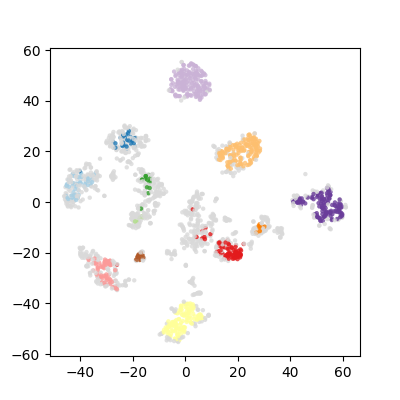

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(projection.T[0], projection.T[1], s=10, linewidth=0, c=[sns.color_palette("Paired", 12)[x] if x >= 0 else (0.85, 0.85, 0.85) for x in gamma_labels[1]], alpha=0.8)
plt.show()

Coloring the points by the gamma-linkage labels after postprocessing the flat clustering in order to cluster all points

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def postProcessing(dataset, labels, k=5) :
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(dataset[labels!=-1], labels[labels!=-1])
    res = labels.copy()
    res[labels==-1] = neigh.predict(dataset[labels==-1,:])
    return res

gamma_labels_post = postProcessing(data,gamma_labels[1])

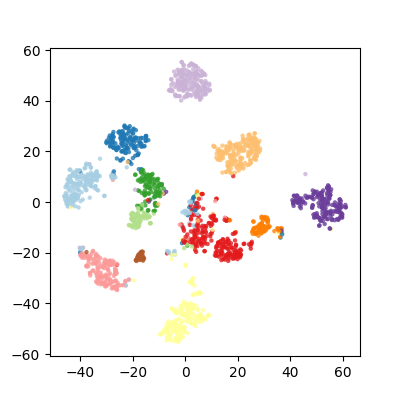

In [8]:
plt.figure(figsize=(4,4))
plt.scatter(projection.T[0], projection.T[1], s=10, linewidth=0, c=[sns.color_palette("Paired", 12)[x] if x >= 0 else (0.85, 0.85, 0.85) for x in gamma_labels_post], alpha=0.8)
plt.show()